<a href="https://www.kaggle.com/code/eavprog/abscur2?scriptVersionId=207680400" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Оглавление проекта "Абсолютный валютный курс" 

Традиционно валютные курсы отражаются в виде парных курсов, показывающих соотношение одной валюты к другой. Это означает, что в числителе и знаменателе каждого курса находятся разные валюты. Однако, что если мы могли бы определить абсолютные курсы каждой отдельной валюты, вне зависимости от ее пары?

Проект "Абсолютные валютные курсы" ставит перед собой именно эту цель - рассчитать абсолютные курсы для 45 ведущих мировых валют на основе 85 доступных валютных пар. Используя математическую оптимизацию, мы находим абсолютную стоимость каждой валюты, позволяя инвесторам, трейдерам и аналитикам получить более глубокое понимание реальной ценности различных национальных денежных единиц.

Ежедневно рассчитываемые абсолютные курсы валют могут быть использованы для широкого спектра финансовых приложений - от портфельного управления до арбитража и хеджирования валютных рисков. Этот инновационный подход к валютным курсам дает уникальные возможности для принятия более обоснованных инвестиционных решений.

Добро пожаловать в мир "Абсолютных валютных курсов" - где традиционные представления о валютных соотношениях трансформируются в новое понимание истинной стоимости мировых денег.

![Проект \"Абсолютный валютный курс\"](https://i.ibb.co/cL0D27B/abscur-znak.jpg)

## Представительства проекта:

Kaggle (расчёт): https://www.kaggle.com/code/eavprog/abscur2

Книга (данные): https://docs.google.com/spreadsheets/d/1azH80JUolc4whN_Uu3Myrrsyv1nEScJ8LK1Lecn0uH4/edit#gid=449604484

Блог (новости): http://www.abscur.ru

Сайт (демонстрация): https://prog815.github.io/abscur2

ВКонтакте (обсуждение): https://vk.com/abscur

WhatsUp (новости): https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs

Viber (новости): https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc

Telegram (обсуждение): https://t.me/AbsCur

Одноклассники (обсуждение): https://ok.ru/group/53547043520717

GitHub (код): https://github.com/prog815/abscur

YouTube (новости): https://www.youtube.com/@eavprog8/community

Smart-lab (обсуждение): https://smart-lab.ru/my/eavpred/

VC (обсуждение): https://vc.ru/u/262921-aleksey-enin

In [1]:
from lib_av import get_currency_exchange_daily_full

  Obtaining dependency information for alpha_vantage from https://files.pythonhosted.org/packages/99/54/d9147df53e87c48795918a43c744fd81586201ad46ce558c77536aeb7bc7/alpha_vantage-3.0.0-py3-none-any.whl.metadata


In [2]:
import pandas as pd
import os
import shutil
import numpy as np
import random
import time
from datetime import datetime, timedelta
from datetime import time as dt_time
import matplotlib.pyplot as plt
from lib_gss_abscur2 import post_df_to_ssh

# Список валютных пар

Проект "Абсолютные валютные курсы" использует 85 ключевых валютных пар, включающих такие популярные сочетания, как AUDUSD, EURUSD, GBPUSD, USDJPY, а также менее распространенные пары, такие как USDARS, USDKZT и USDVND. Этот обширный набор данных по валютным парам, охватывающий 45 основных мировых валют, позволяет применять математическую оптимизацию для расчета абсолютной стоимости каждой денежной единицы. 

In [3]:
pairs = """AUDHKD
AUDJPY
AUDSEK
AUDUSD
CADJPY
CADSEK
CHFAUD
CHFHKD
CHFJPY
EURAUD
EURCAD
EURCHF
EURCNY
EURCZK
EURGBP
EURHKD
EURILS
EURJPY
EURNOK
EURNZD
EURRUB
EURSEK
EURSGD
EURUSD
EURZAR
GBPAUD
GBPCAD
GBPCHF
GBPHKD
GBPJPY
GBPNOK
GBPRUB
GBPSEK
GBPSGD
GBPUSD
HKDSEK
HKDSGD
JPYHKD
JPYSEK
NZDSEK
NZDUSD
SGDAUD
SGDCHF
SGDJPY
USDAED
USDARS
USDBRL
USDCAD
USDCHF
USDCLP
USDCNY
USDCOP
USDCZK
USDDKK
USDEGP
USDGBP
USDHKD
USDHUF
USDIDR
USDILS
USDINR
USDISK
USDJPY
USDKRW
USDKWD
USDKZT
USDMXN
USDMYR
USDNOK
USDPEN
USDPHP
USDPKR
USDPLN
USDQAR
USDRON
USDRUB
USDSAR
USDSEK
USDSGD
USDTHB
USDTRY
USDTWD
USDUAH
USDVND
USDZAR""".split()
pairs = sorted(pairs)
print(pairs)
print(len(pairs))

['AUDHKD', 'AUDJPY', 'AUDSEK', 'AUDUSD', 'CADJPY', 'CADSEK', 'CHFAUD', 'CHFHKD', 'CHFJPY', 'EURAUD', 'EURCAD', 'EURCHF', 'EURCNY', 'EURCZK', 'EURGBP', 'EURHKD', 'EURILS', 'EURJPY', 'EURNOK', 'EURNZD', 'EURRUB', 'EURSEK', 'EURSGD', 'EURUSD', 'EURZAR', 'GBPAUD', 'GBPCAD', 'GBPCHF', 'GBPHKD', 'GBPJPY', 'GBPNOK', 'GBPRUB', 'GBPSEK', 'GBPSGD', 'GBPUSD', 'HKDSEK', 'HKDSGD', 'JPYHKD', 'JPYSEK', 'NZDSEK', 'NZDUSD', 'SGDAUD', 'SGDCHF', 'SGDJPY', 'USDAED', 'USDARS', 'USDBRL', 'USDCAD', 'USDCHF', 'USDCLP', 'USDCNY', 'USDCOP', 'USDCZK', 'USDDKK', 'USDEGP', 'USDGBP', 'USDHKD', 'USDHUF', 'USDIDR', 'USDILS', 'USDINR', 'USDISK', 'USDJPY', 'USDKRW', 'USDKWD', 'USDKZT', 'USDMXN', 'USDMYR', 'USDNOK', 'USDPEN', 'USDPHP', 'USDPKR', 'USDPLN', 'USDQAR', 'USDRON', 'USDRUB', 'USDSAR', 'USDSEK', 'USDSGD', 'USDTHB', 'USDTRY', 'USDTWD', 'USDUAH', 'USDVND', 'USDZAR']
85


# Список валют

Этот список включает 45 основных мировых валют, охватывающих ведущие экономики Северной Америки, Европы, Азии, Океании и Ближнего Востока. Здесь представлены такие известные денежные единицы, как доллар США (USD), евро (EUR), британский фунт (GBP), японская иена (JPY) и китайский юань (CNY), а также менее распространенные валюты, такие как новозеландский доллар (NZD), южноафриканский рэнд (ZAR) и индийская рупия (INR). Этот обширный набор данных по различным национальным денежным системам позволяет проекту "Абсолютные валютные курсы" применять передовые математические методы для определения внутренней стоимости каждой из этих 45 валют.

In [4]:
curs = set()

for pair in pairs:
    curs.add(pair[:3])
    curs.add(pair[3:])

curs = sorted(list(curs))

print(curs)
print(len(curs))

['AED', 'ARS', 'AUD', 'BRL', 'CAD', 'CHF', 'CLP', 'CNY', 'COP', 'CZK', 'DKK', 'EGP', 'EUR', 'GBP', 'HKD', 'HUF', 'IDR', 'ILS', 'INR', 'ISK', 'JPY', 'KRW', 'KWD', 'KZT', 'MXN', 'MYR', 'NOK', 'NZD', 'PEN', 'PHP', 'PKR', 'PLN', 'QAR', 'RON', 'RUB', 'SAR', 'SEK', 'SGD', 'THB', 'TRY', 'TWD', 'UAH', 'USD', 'VND', 'ZAR']
45


# Загрузка валютных пар

В тетрадке реализована загрузка исторических курсов для 85 валютных пар, торгуемых на Forex. Все курсы сохраняются в каталоге pairs тетрадки. 

Ключевым компонентом проекта "Абсолютные валютные курсы" является загрузка и обработка исторических данных по курсам 85 валютных пар, торгуемых на международном валютном рынке Forex. Эти данные охватывают курсы 45 ведущих мировых валют, таких как доллар США, евро, британский фунт, японская иена и китайский юань, а также менее распространенные денежные единицы, включая южноафриканский рэнд, индийскую рупию и российский рубль.

Вся историческая информация по валютным парам получается с помощью API сервиса Alpha Vantage и сохраняется в специальном каталоге `pairs` внутри основной тетрадки проекта. Это позволяет легко обрабатывать набор данных, необходимый для расчета абсолютных курсов валют.

In [5]:
# копирование предыдущих
! mkdir pairs
! cp -rf /kaggle/input/abscur2/pairs/*.csv ./pairs

In [6]:
# Непосредственно загрузка

for pair in pairs[:]:
    for n in range(3):
        try:
            df = get_currency_exchange_daily_full(pair)
            df.to_csv("./pairs/" + pair + ".csv")
            print(pair, "- загружена. С " + str(df.index.min().date()) + ". По " + str(df.index.max().date()) + ". Строк " + str(df.shape[0]) + ".")
            break
        except Exception as e:
            print(pair, "- ошибка загрузки")
            time.sleep(5)

AUDHKD - загружена. С 2005-09-09. По 2024-11-15. Строк 5000.
AUDJPY - загружена. С 2014-11-16. По 2024-11-15. Строк 2610.
AUDSEK - загружена. С 2014-11-07. По 2024-11-15. Строк 2613.
AUDUSD - загружена. С 2014-11-16. По 2024-11-15. Строк 2608.
CADJPY - загружена. С 2014-11-16. По 2024-11-15. Строк 2609.
CADSEK - загружена. С 2014-11-07. По 2024-11-15. Строк 2614.
CHFAUD - загружена. С 2006-07-10. По 2024-11-15. Строк 4771.
CHFHKD - загружена. С 2005-09-09. По 2024-11-15. Строк 5000.
CHFJPY - загружена. С 2014-11-16. По 2024-11-15. Строк 2609.
EURAUD - загружена. С 2014-11-16. По 2024-11-15. Строк 2609.
EURCAD - загружена. С 2014-11-16. По 2024-11-15. Строк 2609.
EURCHF - загружена. С 2005-09-16. По 2024-11-15. Строк 5000.
EURCNY - загружена. С 2008-09-04. По 2024-11-15. Строк 4201.
EURCZK - ошибка загрузки
EURCZK - ошибка загрузки
EURCZK - загружена. С 2014-11-07. По 2024-11-15. Строк 2615.
EURGBP - загружена. С 2014-11-16. По 2024-11-15. Строк 2609.
EURHKD - загружена. С 2006-07-10. П

# Соединяем парные курсы в одну таблицу

После загрузки исторических данных по 85 валютным парам, в тетрадке реализуется процесс сбора всех курсов закрытия в единую таблицу. Этот сводный файл с котировками сохраняется под именем `pairs_close.csv` и доступен для скачивания без ограничений.

Таким образом, вся информация по парным валютным курсам собирается в структурированном виде, что значительно упрощает дальнейшую обработку данных. Более того, эта сводная таблица `pairs_close.csv` выкладывается на общедоступный лист Google Docs по адресу https://docs.google.com/spreadsheets/d/1azH80JUolc4whN_Uu3Myrrsyv1nEScJ8LK1Lecn0uH4/edit#gid=302188018, предоставляя открытый доступ к этим ценным данным.

Для наглядного представления динамики парных валютных курсов, в блоге проекта по адресу https://www.abscur.ru/p/blog-page_54.html и на сайте https://prog815.github.io/abscur2/pair.html размещены интерактивные графики. Это позволяет пользователям визуально анализировать поведение различных валютных пар.

In [7]:
def get_close_fn(fn):
    df = pd.read_csv(fn,index_col="Date")
    
    # исправляем ошибки поставщика котировок при превышении закрытия над максимум в дне
    idx = df.Close > df.High
    df.loc[idx,'Close'] = df[idx].High
    
    # исправляем ошибки поставщика котировок при превышении минимума над закрытием в дне
    idx = df.Close < df.Low
    df.loc[idx,'Close'] = df[idx].Low
    
    return df

class History:
    cots = None
    
    def __init__(self):
        self.cots = {}
    
    def append(self,closeSeries):
        for key,val in closeSeries.items():
            if key in self.cots:
                self.cots[key].append(val)
            else:
                self.cots[key] = [val]


    def getSeries(self):
        
        from statistics import mode
        
        return pd.Series({key: mode(value) for key, value in self.cots.items()},name='Close')
         
        
# hist = History()
# pair = 'SGDCHF'
# Путь к основному каталогу
# base_directory = '/kaggle/input/abscur2/history'

# # Получаем список подкаталогов
# subdirectories = [d for d in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, d))]

# for subdir in subdirectories:
#     fn = base_directory + "/" + subdir + "/pairs/" + pair + ".csv"
#     print(fn)
#     df = get_close_fn(fn)
#     hist.append(df.Close)
        
# hist.getSeries()

In [8]:
pairs_close = pd.DataFrame(columns=["Date"])
pairs_close.set_index('Date', inplace=True)

max_start_date = pd.to_datetime('1900-01-01').date()

# Путь к основному каталогу истории
base_directory = '/kaggle/input/abscur2/history'

# Получаем список подкаталогов
# subdirectories = [d for d in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, d))]

for pair in pairs[:]:
    
    hist = History()
    
#     for subdir in subdirectories:
#         fn = base_directory + "/" + subdir + "/pairs/" + pair + ".csv"
#         df = get_close_fn(fn)
#         hist.append(df.Close)

    fn = "./pairs/" + pair + ".csv"
    df = get_close_fn(fn)
    hist.append(df.Close)
    
    df.loc[:,'Close'] = hist.getSeries()[df.index]
    
    df.rename(columns={'Close': pair}, inplace=True)
    
#     print(df.iloc[-1,:])
    
    max_start_date = max(max_start_date, pd.to_datetime(df.index.min()).date())
    
    pairs_close = pairs_close.join(df[[pair]], how='outer')
    
    
pairs_close = pairs_close[pd.to_datetime(pairs_close.index).date >= max_start_date]
pairs_close.sort_index(inplace=True)

# режем выбросы
pairs_close = pairs_close.where(pairs_close >= pairs_close.quantile(0.01, axis=0) / 2 , other=np.nan)
pairs_close = pairs_close.where(pairs_close <= pairs_close.quantile(0.99, axis=0) * 2, other=np.nan)

# заполняем пустоты
pairs_close.ffill(inplace=True)
pairs_close.bfill(inplace=True)

# ограничиваемся вчерашним днем
yesterday = (datetime.today() - timedelta(days=1)).date() if datetime.today().time() < dt_time(12,0,0) else datetime.today().date()
pairs_close = pairs_close[pd.to_datetime(pairs_close.index) <= pd.to_datetime(yesterday)]

# сохранем на диск
pairs_close.to_csv("pairs_close.csv")

# передаем в книгу на Google Drive
post_df_to_ssh("Парные валютные курсы",pairs_close)

pairs_close

,AUDHKD,AUDJPY,AUDSEK,AUDUSD,CADJPY,CADSEK,CHFAUD,CHFHKD,CHFJPY,EURAUD,...,USDRUB,USDSAR,USDSEK,USDSGD,USDTHB,USDTRY,USDTWD,USDUAH,USDVND,USDZAR
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-16,6.7440,102.2200,6.4665,0.87497,103.490,6.5785,1.19070,8.0350,121.76300,1.43065,...,47.1923,3.7518,7.39190,1.29803,32.77,2.22948,30.680,15.3355,21310.0,11.08330
2014-11-17,6.7440,101.5544,6.4665,0.87085,103.230,6.5785,1.19070,8.0350,120.87640,1.42920,...,47.1923,3.7518,7.43440,1.29803,32.77,2.22998,30.680,15.3355,21310.0,11.12012
2014-11-18,6.7571,101.7690,6.4265,0.87093,103.235,6.5230,1.19630,8.0883,121.91500,1.43900,...,46.9024,3.7518,7.38230,1.29746,32.74,2.22044,30.725,15.2600,21355.0,11.02420
2014-11-19,6.6689,101.5920,6.3435,0.86014,104.060,6.5015,1.21360,8.0968,123.31600,1.45796,...,46.8578,3.7518,7.39437,1.30955,32.75,2.23100,30.862,15.1000,21280.0,11.05325
2014-11-20,6.6827,101.9220,6.3691,0.86237,104.517,6.5345,1.21000,8.0906,123.35000,1.45480,...,46.3910,3.7516,7.39330,1.29973,32.78,2.22026,30.895,15.1450,21295.0,10.95450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-11,5.1114,100.9410,7.1251,0.65776,110.239,7.7814,1.72621,8.8266,174.30701,1.62089,...,95.4760,3.7530,10.83438,1.33352,34.50,34.32660,32.379,41.2982,25310.0,17.90840
2024-11-12,5.0810,100.9730,7.1141,0.65294,110.896,7.8096,1.73538,8.8206,175.30100,1.62550,...,98.2400,3.7570,10.90479,1.33810,34.81,34.37080,32.430,41.2982,25340.0,18.10110
2024-11-13,5.0457,100.9070,7.1195,0.64927,111.074,7.8418,1.73967,8.7810,175.46271,1.62702,...,98.4250,3.7543,10.97953,1.34261,34.81,34.34520,32.454,41.3763,25330.0,18.22530


Представленная таблица содержит исторические данные по 85 ключевым валютным парам, таким как AUDHKD, AUDJPY, AUDSEK, AUDUSD, CADJPY и многие другие. Каждая строка в таблице соответствует определенной дате, а столбцы отражают котировки закрытия для каждой из этих 85 валютных пар.

# Последние парные валютные курсы 

В рамках проекта "Абсолютные валютные курсы" формируется таблица, содержащая последние доступные котировки закрытия для всех 85 загруженных валютных пар. Этот сводный файл с актуальными курсами сохраняется в тетрадке под названием `pairs_last.csv` и доступен для свободного скачивания.

Более того, данная таблица с последними парными валютными курсами публикуется на открытом листе Google Docs по адресу https://docs.google.com/spreadsheets/d/1azH80JUolc4whN_Uu3Myrrsyv1nEScJ8LK1Lecn0uH4/edit#gid=1907887665. Это обеспечивает удобный онлайн-доступ к этим ценным рыночным данным.

Для наглядного представления актуальных парных валютных курсов, на странице блога проекта по ссылке https://www.abscur.ru/p/blog-page_52.html и на сайте https://prog815.github.io/abscur2/pairs_last.html размещены интерактивные таблицы. Пользователи могут визуально анализировать текущее состояние различных валютных пар.

In [9]:
pairs_last = pairs_close.iloc[[-1],:].T
pairs_last.index.name = "Валютные пары"
pairs_last.columns = ['Курс на ' + pairs_last.columns[0]]

# сохранем на диск
pairs_last.to_csv("pairs_last.csv")

# передаем в книгу на Google Drive
post_df_to_ssh("Последние парные валютные курсы",pairs_last)

pairs_last

,Курс на 2024-11-15
Валютные пары,
AUDHKD,5.02830
AUDJPY,99.76800
AUDSEK,7.08760
AUDUSD,0.64597
CADJPY,109.57000
...,...
USDTRY,34.42400
USDTWD,32.44300
USDUAH,41.34130


# Расчет абсолютных курсов

Ключевым этапом проекта "Абсолютные валютные курсы" является вычисление внутренней стоимости каждой из 45 ведущих мировых валют. Этот процесс реализован в тетрадке, доступной по ссылке https://www.kaggle.com/code/eavprog/abscur-approks.

Любой парный валютный курс может быть представлен как отношение двух абсолютных валютных курсов. Например:

$$
EURUSD = \frac{EUR}{USD}
$$

Для расчета абсолютных курсов, в первую очередь, формируется матрица перехода между парными и абсолютными котировками. Эта матрица состоит из нулей, единиц и минус единиц:

- Нуль означает отсутствие связи между валютной парой и конкретной валютой.
- Единица указывает, что валюта находится в числителе парного курса.
- Минус единица означает, что валюта находится в знаменателе парного курса.

Таким образом, горизонтали матрицы соответствуют парным валютным курсам, а вертикали - конкретным валютам. Эта структура данных служит основой для дальнейшего применения методов математической оптимизации.

Используя построенную матрицу перехода и данные по 85 валютным парам, проект вычисляет абсолютные курсы 45 ведущих мировых валют. Результатом является набор внутренних стоимостей каждой национальной денежной единицы, который может быть применен в широком спектре финансовых задач.

Такой инновационный подход к определению абсолютных валютных курсов открывает новые возможности для более глубокого понимания динамики мировых валютных рынков.

In [10]:
# Строим матрицу перехода от абсолютныых курсов к парным
M = np.zeros([len(pairs),len(curs)])
for pair in pairs:
    cur1,cur2 = pair[:3],pair[3:]
    pair_index = pairs.index(pair)
    cur1_index = curs.index(cur1)
    cur2_index = curs.index(cur2)
    M[pair_index,cur1_index] = 1
    M[pair_index,cur2_index] = -1
M 

array([[ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1., -1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0., -1.]])

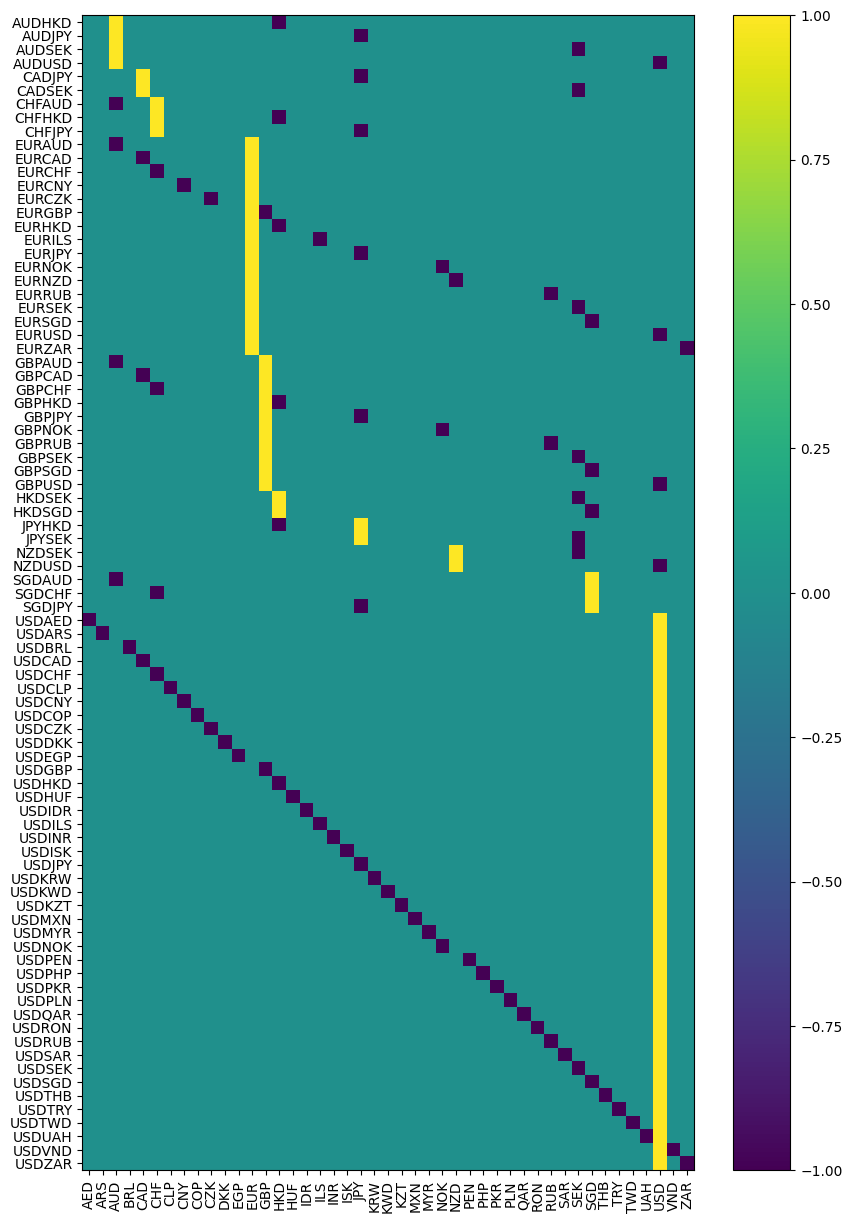

In [11]:
# выводим матрицу
plt.figure(figsize=(10,15))
plt.imshow(M, cmap='viridis', interpolation='none')
plt.xticks(np.arange(len(curs)), curs, rotation=90)
plt.yticks(np.arange(len(pairs)), pairs)
plt.colorbar()
plt.show()

Расчет абсолютных валютных курсов методом наименьших квадратов

Ключевой этап проекта "Абсолютные валютные курсы" - вычисление внутренней стоимости каждой из 45 ведущих мировых валют. Для этого используется метод наименьших квадратов, который позволяет найти оптимальные абсолютные курсы, наилучшим образом соответствующие имеющимся данным по 85 валютным парам.

Алгоритм расчета абсолютных курсов:

- Для каждого дня в историческом наборе данных формируется система линейных уравнений, связывающих абсолютные курсы валют с наблюдаемыми парными котировками.
- Применяя метод наименьших квадратов, решается эта система уравнений, в результате чего определяются абсолютные курсы 45 валют на данный день.
- Процесс повторяется для всех дней в наборе данных, формируя полную временную серию абсолютных валютных курсов.

Результирующая таблица абсолютных курсов сохраняется под именем `abscur.csv` и также публикуется в открытом доступе на Google Drive по адресу https://docs.google.com/spreadsheets/d/1azH80JUolc4whN_Uu3Myrrsyv1nEScJ8LK1Lecn0uH4/edit#gid=2038786153.

Для наглядного представления динамики абсолютных валютных курсов на странице блога проекта по ссылке https://www.abscur.ru/p/2.html и на сайте https://prog815.github.io/abscur2/abs.html размещены интерактивные графики. Это позволяет пользователям визуально анализировать поведение различных национальных денежных единиц во времени.

In [12]:
abscur = pd.DataFrame(columns=curs,index=pd.to_datetime(pairs_close.index), dtype='float64')
for i in range(pairs_close.shape[0]):
    lnA, _, _, _ = np.linalg.lstsq(M, np.log(pairs_close.iloc[i,:].values), rcond=None)
    abscur.iloc[i,:] = np.exp(lnA)

# сохранем на диск
abscur.to_csv("abscur.csv")

# передаем в книгу на Google Drive
post_df_to_ssh("Абсолютные валютные курсы",abscur)

abscur

,AED,ARS,AUD,BRL,CAD,CHF,CLP,CNY,COP,CZK,...,SAR,SEK,SGD,THB,TRY,TWD,UAH,USD,VND,ZAR
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-16,3.843659,1.681967,12.328307,5.436598,12.501260,14.679326,0.023693,2.308815,0.006545,0.636427,...,3.762929,1.903241,10.901805,0.430814,6.332310,0.460162,0.920593,14.117759,0.000662,1.274950
2014-11-17,3.847177,1.661085,12.302174,5.425071,12.508236,14.646960,0.023715,2.307335,0.006551,0.636019,...,3.766374,1.901566,10.897988,0.431208,6.336685,0.460583,0.921436,14.130681,0.000663,1.272021
2014-11-18,3.839161,1.657176,12.283538,5.467503,12.455131,14.708658,0.023614,2.303857,0.006559,0.638060,...,3.758526,1.911205,10.876326,0.430704,6.350650,0.458950,0.924065,14.101238,0.000660,1.279452
2014-11-19,3.844589,1.659006,12.144177,5.496824,12.436462,14.742939,0.023506,2.307287,0.006568,0.640303,...,3.763738,1.911656,10.801674,0.431169,6.329355,0.457546,0.935152,14.120791,0.000664,1.277819
2014-11-20,3.841228,1.657399,12.163838,5.490309,12.474457,14.722983,0.023530,2.304074,0.006532,0.640013,...,3.760648,1.909199,10.861360,0.430398,6.354412,0.456658,0.931558,14.108447,0.000663,1.288188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-11,6.206847,0.022831,14.993983,3.960998,16.371082,25.890196,0.023312,3.160416,0.005231,0.959325,...,6.074375,2.106171,17.100787,0.660786,0.664124,0.704071,0.552013,22.797130,0.000901,1.273587
2024-11-12,6.232127,0.022944,14.950598,3.982112,16.413772,25.951218,0.023302,3.163479,0.005150,0.958644,...,6.092621,2.102672,17.098638,0.657569,0.665972,0.705827,0.554261,22.889979,0.000903,1.264517
2024-11-13,6.242621,0.022969,14.882089,3.988818,16.385362,25.885623,0.023473,3.172286,0.005121,0.959177,...,6.107270,2.090693,17.079634,0.658676,0.667590,0.706493,0.554146,22.928523,0.000905,1.258587


Полученная таблица представляет собой результат расчета абсолютных валютных курсов для 45 ведущих мировых валют на основе исторических данных по 85 валютным парам. Она содержит временную серию абсолютных курсов.

Каждая строка соответствует определенной дате, а столбцы отражают абсолютные курсы для 45 валют, включая такие известные, как доллар США (USD), евро (EUR), британский фунт (GBP), японская иена (JPY) и китайский юань (CNY), а также менее распространенные, например, южноафриканский рэнд (ZAR), индийская рупия (INR) и российский рубль (RUB).

# Ошибка восстановления пар

А теперь попробуем обратно восстановить валютные пары из абсолютных курсов и посмотреть на погрешность.

In [13]:
pairs_delta = pairs_close.copy()
for pair in pairs_delta.columns:
    abs1, abs2 = pair[:3], pair[3:]
    pairs_delta[pair] = (pairs_close[pair].values - abscur[abs1].values / abscur[abs2].values) / pairs_close[pair].values
    

# сохранем на диск
pairs_delta.to_csv("pairs_delta.csv")

# передаем в книгу на Google Drive
post_df_to_ssh("Относительная ошибка восстановления пары",pairs_delta)
    
pairs_delta

Валютные пары,AUDHKD,AUDJPY,AUDSEK,AUDUSD,CADJPY,CADSEK,CHFAUD,CHFHKD,CHFJPY,EURAUD,...,USDRUB,USDSAR,USDSEK,USDSGD,USDTHB,USDTRY,USDTWD,USDUAH,USDVND,USDZAR
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-16,-0.002912,0.001770,-0.001706,0.001968,0.000188,0.001534,-7.564091e-07,-0.002299,0.002176,0.000452,...,0.001649,2.959174e-15,-0.003496,0.002340,4.336544e-15,3.585413e-15,2.894975e-15,3.474990e-15,2.390038e-15,0.000912
2014-11-17,-0.001444,-0.000312,-0.000463,0.000287,-0.000558,0.000097,8.454516e-05,-0.000746,-0.000595,-0.000486,...,0.000082,6.510184e-15,0.000447,0.001077,4.553371e-15,6.372638e-15,4.863558e-15,4.633320e-15,1.195019e-15,0.001014
2014-11-18,-0.000467,-0.000970,-0.000096,-0.000191,-0.000540,0.000935,-9.432574e-04,-0.000819,-0.000527,0.000302,...,0.000365,1.420404e-15,0.000557,0.000734,1.736207e-15,3.600010e-15,1.850071e-15,1.047655e-15,-1.703572e-16,0.000262
2014-11-19,-0.000663,-0.000566,-0.001450,0.000138,-0.000346,-0.000630,-3.233536e-04,-0.000564,-0.000695,-0.000331,...,-0.000204,1.775505e-15,0.001040,0.001735,2.169596e-15,2.786754e-15,1.611626e-15,1.999872e-15,2.051492e-15,0.000231
2014-11-20,-0.001209,-0.000397,-0.000326,0.000235,-0.000471,0.000096,-3.219595e-04,-0.000970,-0.000521,0.000063,...,0.000095,2.959332e-15,0.000484,0.000594,3.034655e-15,2.800235e-15,5.749658e-16,1.172900e-15,1.708372e-15,0.000213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-11,0.000382,-0.001579,0.000846,0.000071,-0.001332,0.001091,-2.871622e-04,0.000463,-0.001512,0.000289,...,-0.000035,1.656608e-15,0.000961,0.000312,3.295271e-15,3.932901e-15,3.291683e-15,3.268983e-15,3.162210e-15,0.000472
2024-11-12,0.000467,-0.001461,0.000536,-0.000322,-0.001091,0.000442,-2.408911e-04,0.000581,-0.001277,-0.000206,...,-0.000405,2.009453e-15,0.001710,-0.000450,4.898887e-15,4.134572e-15,3.067406e-15,5.333604e-15,1.866366e-15,-0.000036
2024-11-13,-0.000057,-0.000762,0.000175,0.000317,-0.000995,0.000576,1.661026e-04,0.000467,-0.001065,-0.000356,...,-0.001811,2.247475e-15,0.001146,0.000121,6.123609e-16,4.137654e-16,4.159830e-15,1.888997e-15,1.867103e-15,0.000419


In [14]:
pairs_delta_stat = pairs_delta.describe().T

# сохранем на диск
pairs_delta_stat.to_csv("pairs_delta_stat.csv")

# передаем в книгу на Google Drive
post_df_to_ssh("Статистика ошибки восстановления пар",pairs_delta_stat)

pairs_delta_stat

,count,mean,std,min,25%,50%,75%,max
Валютные пары,,,,,,,,
AUDHKD,3132.0,-2.679005e-04,1.150098e-03,-9.147963e-03,-7.916130e-04,-1.558065e-04,2.536921e-04,7.031180e-03
AUDJPY,3132.0,-6.987094e-04,1.396576e-03,-1.458930e-02,-1.057511e-03,-5.776800e-04,-2.297353e-04,1.025488e-02
AUDSEK,3132.0,2.425871e-05,1.069936e-03,-6.087527e-03,-5.434570e-04,-1.215093e-04,4.545689e-04,7.487754e-03
AUDUSD,3132.0,-9.193650e-05,1.156456e-03,-9.482360e-03,-4.098012e-04,-5.969243e-05,2.624942e-04,8.083367e-03
CADJPY,3132.0,-5.628899e-04,9.689702e-04,-1.474007e-02,-7.788794e-04,-4.280786e-04,-2.095302e-04,1.088157e-02
...,...,...,...,...,...,...,...,...
USDTRY,3132.0,3.734112e-15,1.860449e-15,-2.515869e-15,2.461153e-15,3.693061e-15,4.999116e-15,1.079608e-14
USDTWD,3132.0,3.452771e-15,1.751827e-15,-2.291170e-15,2.266608e-15,3.470507e-15,4.625714e-15,9.838180e-15
USDUAH,3132.0,3.175579e-15,1.678673e-15,-3.614290e-15,2.017155e-15,3.126388e-15,4.268764e-15,9.138691e-15


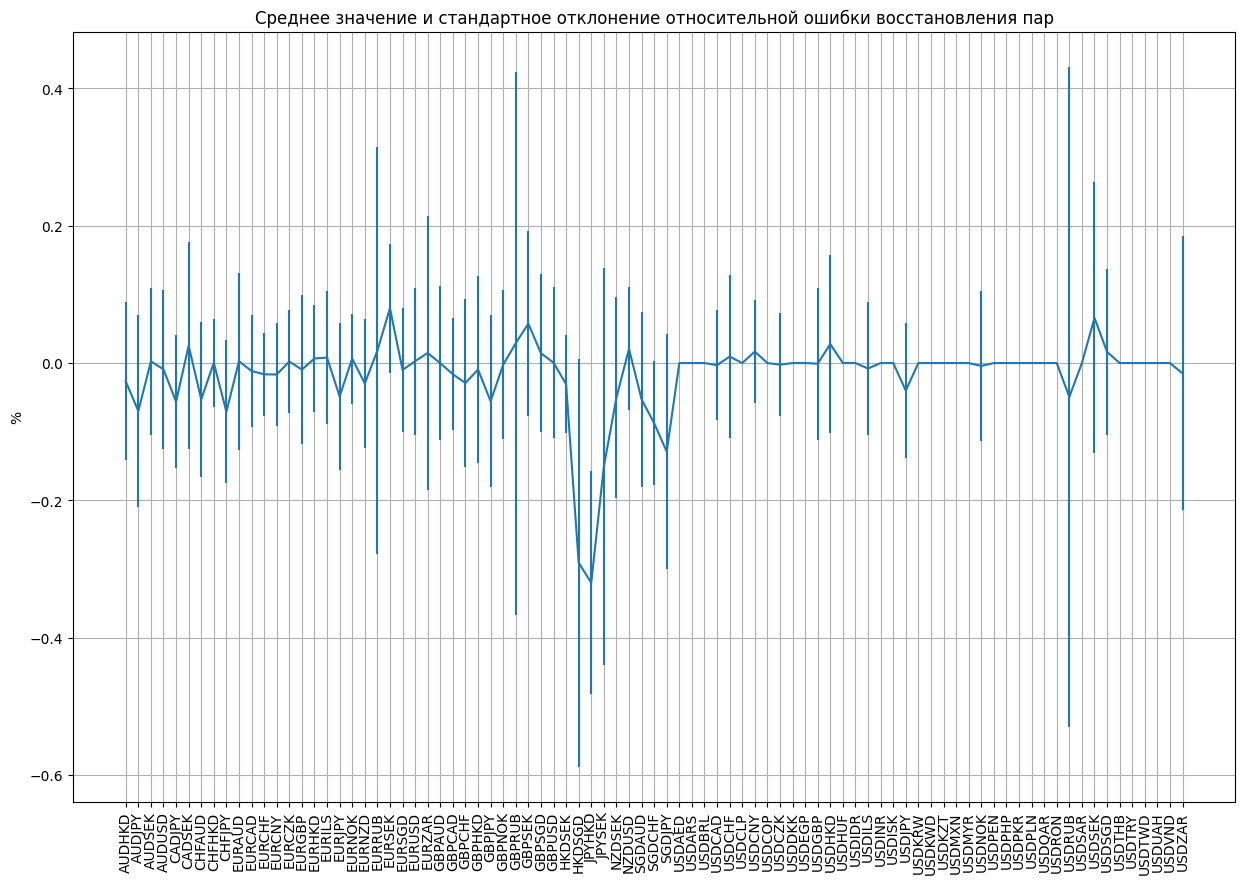

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
# bars = ax.bar(pairs_delta_stat.index, pairs_delta_stat['mean']*100, label='Mean')
plt.title("Среднее значение и стандартное отклонение относительной ошибки восстановления пар")
plt.ylabel('%')

ax.errorbar(pairs_delta_stat.index,pairs_delta_stat['mean']*100,pairs_delta_stat['std']*100)

# for i, pair in enumerate(pairs_delta_stat.index):
#     ax.errorbar(pair, pairs_delta_stat.loc[pair, 'mean']*100, yerr=pairs_delta_stat.loc[pair, 'std'], color='black', fmt='_', capsize=5, capthick=2)


ax.set_xticks(np.arange(len(pairs_delta_stat.index)))
ax.set_xticklabels(pairs_delta_stat.index, rotation=90)
ax.grid()


# Последние абсолютные валютные курсы

Собирается таблица с последними абсолютными валютными курсами закрытий всех имеющихся 45 валют, которая сохраняется в тетрадке под именем `abs_last.csv`. Все сохраненные в тетрадке файлы доступны для скачивания без ограничений. 

Таблица с абсолютными курсами валют выкладывается на листе в Google Docs по адресу https://docs.google.com/spreadsheets/d/1azH80JUolc4whN_Uu3Myrrsyv1nEScJ8LK1Lecn0uH4/edit#gid=740234571.

Таблицы последних абсолютных валютных курсов в интерактивном режиме можно посмотреть в блоге по адресу https://www.abscur.ru/p/blog-page_59.html и на сайте по адресу https://prog815.github.io/abscur2/abs_last.html.

In [16]:
abscur_last = abscur.iloc[[-1],:].T
abscur_last.index.name = "Валюты"
abscur_last.columns = ['Курс на ' + str(abscur_last.columns[0])[:10]]

# сохранем на диск
abscur_last.to_csv("abscur_last.csv")

# передаем в книгу на Google Drive
post_df_to_ssh("Последние абсолютные валютные курсы",abscur_last)

abscur_last

,Курс на 2024-11-15
Валюты,
AED,6.244844
ARS,0.022968
AUD,14.827065
BRL,3.957680
CAD,16.289834
CHF,25.826567
CLP,0.023502
CNY,3.173624
COP,0.005185


# Задаем диапазоны

In [17]:
fmt = """30	за месяц	1m
90	за квартал	1kv
180	за полгода	6m
365	за год	1y
730	за два года	2y
1095	за три года	3y
1825	за пять лет	5y
18250	за все время	all"""
fmt_diap = np.array([ln.split("\t") for ln in fmt.split("\n")])
fmt_diap

array([['30', 'за месяц', '1m'],
       ['90', 'за квартал', '1kv'],
       ['180', 'за полгода', '6m'],
       ['365', 'за год', '1y'],
       ['730', 'за два года', '2y'],
       ['1095', 'за три года', '3y'],
       ['1825', 'за пять лет', '5y'],
       ['18250', 'за все время', 'all']], dtype='<U12')

# Рейтинг абсолютной доходности валют

Доходности всех валют за разные периоды рассчитываются и складываются в файл `reit_doh.csv` и в таблицу на Google Drive по адресу
https://docs.google.com/spreadsheets/d/1azH80JUolc4whN_Uu3Myrrsyv1nEScJ8LK1Lecn0uH4/edit#gid=680888126.

Доходность считаем по формуле:

$$
Doh = (\sum_{n=1}^{N}{\frac{\Delta X_n}{X_n}}+1)^{252}-1
$$

, где $X_n$ - значение в диапазоне для курса валюты, $\Delta X_n$ - изменение значения в диапазоне для курса валюты. Возведением в степень 252 нормируем к году. 

Посмотреть результаты удобнее всего будет на сайте (см. https://prog815.github.io/abscur2/reit_doh.html) или в блоге (см. https://www.abscur.ru/p/blog-page_3.html).

In [18]:
reit_doh = pd.DataFrame(columns=fmt_diap[:,1],index=abscur.columns,dtype=float)
for i in range(fmt_diap.shape[0]):
    df = abscur[abscur.index >= abscur.index[-1] - timedelta(days=int(fmt_diap[i,0]))]
#     reit_doh.iloc[:,i] = (df.iloc[-1,:] - df.iloc[0,:]) / df.iloc[0,:]
    reit_doh.iloc[:,i] = np.power(df.pct_change().mean().values+1,252)-1

reit_doh.index.name = "Валюта"
    
# сохранем на диск
reit_doh.to_csv("reit_doh.csv")

# передаем в книгу на Google Drive
post_df_to_ssh("Рейтинг абсолютной доходности",reit_doh)

reit_doh

,за месяц,за квартал,за полгода,за год,за два года,за три года,за пять лет,за все время
Валюта,,,,,,,,
AED,0.217682,0.100779,0.055551,0.055558,0.041972,0.058678,0.041907,0.040573
ARS,0.016600,-0.102487,-0.134708,-0.448638,-0.445242,-0.388742,-0.311083,-0.270257
AUD,-0.094889,-0.006646,-0.003065,0.055906,0.025766,0.026159,0.034547,0.017090
BRL,-0.012155,-0.082611,-0.137267,-0.079813,0.017264,0.050689,-0.002746,-0.016121
CAD,-0.028918,0.000363,-0.001543,0.035848,0.019357,0.026984,0.031679,0.022807
CHF,-0.055762,0.015215,0.096907,0.056930,0.068669,0.072730,0.060893,0.049510
CLP,-0.188079,-0.029815,-0.089910,-0.021419,0.019454,0.015974,0.011064,0.004620
CNY,0.052500,0.065651,0.054216,0.057133,0.033562,0.024414,0.036747,0.026770
COP,-0.160522,-0.185905,-0.161375,-0.005924,0.095438,0.029750,0.005709,-0.011871


# Рейтинг абсолютной волатильности валют

Волатильности всех валют за разные периоды рассчитываются и складываются в файл `reit_vol.csv` и в таблицу на Google Drive по адресу https://docs.google.com/spreadsheets/d/1azH80JUolc4whN_Uu3Myrrsyv1nEScJ8LK1Lecn0uH4/edit#gid=758386108.

Сначала посчитаем относительные изменения абсолютных курсов по следующей формуле:
$$
X^{'}_k = \frac{X_k-X_{k-1}}{X_{k-1}}
$$

Волатильность считаем по формуле:

$$
Vol = {std(X^{'})}\times{\sqrt{252}}
$$

, где $std(X^{'})$ - стандартное отклонение для относительных изменений абсолютных курсов валюты за некоторый период. Домножением на $\sqrt{252}$ нормируем к году.

Посмотреть результаты удобнее всего будет на сайте (см. https://prog815.github.io/abscur2/reit_vol.html) или в блоге (см. https://www.abscur.ru/p/blog-page_26.html).

In [19]:
reit_vol = pd.DataFrame(columns=fmt_diap[:,1],index=abscur.columns,dtype=float)

for i in range(fmt_diap.shape[0]):
    df = abscur[abscur.index >= abscur.index[-1] - timedelta(days=int(fmt_diap[i,0]))]
    reit_vol.iloc[:,i] = df.pct_change().std() * np.sqrt(252)

reit_vol.index.name = "Валюта"
    
# сохранем на диск
reit_vol.to_csv("reit_vol.csv")

# передаем в книгу на Google Drive
post_df_to_ssh("Рейтинг абсолютной волатильности",reit_vol)

reit_vol

,за месяц,за квартал,за полгода,за год,за два года,за три года,за пять лет,за все время
Валюта,,,,,,,,
AED,0.043381,0.036495,0.032002,0.033901,0.036477,0.040899,0.039642,0.037689
ARS,0.051802,0.046648,0.045799,0.482870,0.360817,0.297208,0.232174,0.211986
AUD,0.058798,0.054062,0.050038,0.057352,0.063968,0.068533,0.067447,0.064700
BRL,0.123400,0.115862,0.109857,0.096790,0.101773,0.119860,0.134363,0.136364
CAD,0.027842,0.031807,0.030229,0.036786,0.040272,0.043742,0.045650,0.049923
CHF,0.041926,0.051144,0.056128,0.053001,0.051937,0.056096,0.053639,0.077531
CLP,0.099315,0.093397,0.099982,0.106540,0.113672,0.135045,0.124506,0.102661
CNY,0.021126,0.026191,0.027619,0.031357,0.036327,0.041801,0.040325,0.040322
COP,0.115955,0.102342,0.105545,0.097379,0.114374,0.121802,0.116102,0.116622


# Рейтинг валют по коэффициенту Шарпа

Коэффициенты Шарпа для всех валют за разные периоды рассчитываются и складываются в файл `reit_sharp.csv`, а также в таблицу на Google Drive по адресу https://docs.google.com/spreadsheets/d/1azH80JUolc4whN_Uu3Myrrsyv1nEScJ8LK1Lecn0uH4/edit#gid=1774745239.

Сначала посчитаем относительные изменения абсолютных курсов по следующей формуле:
$$
X^{'}_k = \frac{X_k-X_{k-1}}{X_{k-1}}
$$

Коэффициенты Шарпа считаем по такой формуле:

$$
koefSharp = \frac{mean(X^{'})}{std(X^{'})}\times{\sqrt{252}}
$$

, где $std(X^{'})$ - стандартное отклонение для относительных изменений абсолютных курсов валюты за некоторый период, $mean(X^{'})$ - среднее значения для относительных изменений абсолютных курсов валюты за некоторый период. Результат нормируем к году домножив на $\sqrt{252}$.

Посмотреть результаты удобнее всего будет на сайте (см. https://prog815.github.io/abscur2/reit_sharp.html) или в блоге (см. https://www.abscur.ru/p/blog-page_6.html).

In [20]:
reit_sharp = pd.DataFrame(columns=fmt_diap[:,1],index=abscur.columns,dtype=float)
d_abscur = abscur.pct_change()

for i in range(fmt_diap.shape[0]):
    df = d_abscur[abscur.index >= abscur.index[-1] - timedelta(days=int(fmt_diap[i,0]))]
    reit_sharp.iloc[:,i] = df.mean() / df.std() * np.sqrt(252)

reit_sharp.index.name = "Валюта"
    
# сохранем на диск
reit_sharp.to_csv("reit_sharp.csv")

# передаем в книгу на Google Drive
post_df_to_ssh("Рейтинг валют по коэффициенту Шарпа",reit_sharp)

reit_sharp

,за месяц,за квартал,за полгода,за год,за два года,за три года,за пять лет,за все время
Валюта,,,,,,,,
AED,4.740921,2.447761,1.661014,1.590491,1.140831,1.419063,1.031961,1.055338
ARS,0.430101,-2.003058,-3.038621,-1.232706,-1.630727,-1.650071,-1.601627,-1.485313
AUD,-2.028465,0.155890,-0.032600,0.854733,0.385672,0.369668,0.507808,0.261922
BRL,-0.211159,-0.718018,-1.266594,-0.860799,0.123705,0.402822,-0.021579,-0.119177
CAD,0.152044,0.185463,-0.054424,0.841329,0.450604,0.609266,0.686944,0.451719
CHF,-1.659373,0.479070,1.621099,1.026245,1.282148,1.245277,1.103519,0.623337
CLP,-1.428872,-0.381893,-0.946333,-0.177574,0.071569,0.087053,0.087290,0.044895
CNY,2.953650,2.406571,1.882935,1.780263,0.859343,0.593166,0.895542,0.655211
COP,-1.580875,-2.050693,-1.668398,-0.156492,0.731247,0.243907,0.047882,-0.102399


# Сохранение истории данных

In [21]:
# ! cp -rf /kaggle/input/abscur2/history .
# ! rm -r history/$(date +'%Y-%m-%d')
# ! mkdir -p history/$(date +'%Y-%m-%d')
# ! cp *.csv history/$(date +'%Y-%m-%d')
# ! cp -r ./pairs history/$(date +'%Y-%m-%d')

# Лучшие валютные портфели

В разделе "Лучшие валютные портфели по коэффициенту Шарпа" представлена информация о лучших валютных портфелях, оптимизированных с учетом коэффициента Шарпа. 

Таблица на странице содержит доли каждой валюты в этих портфелях за разные временные диапазоны. Доли валют вычисляются математической оптимизацией для повышения коэффициента Шарпа портфеля, используя абсолютные валютные курсы. Такой подход позволяет сравнивать и оптимизировать портфели на основе общего знаменателя, что невозможно при использовании парных валютных курсов.

Дополнительно, представлена таблица со статистикой по лучшим портфелям, включающая коэффициент Шарпа (приведенный к году), годовую доходность и волатильность. Эти показатели помогают оценить эффективность и риски портфелей. График ниже демонстрирует развитие лучших портфелей в процентах со старта на 100%, позволяя визуально отслеживать их динамику во времени.

Посмотреть результаты удобнее всего будет в блоге (см. https://www.abscur.ru/p/blog-page_8.html) или на сайте (см. https://prog815.github.io/abscur2/best_portf_sharp.html).

In [22]:
from scipy.optimize import minimize

def softmax(x):
    exp_x = np.exp(x - np.max(x))  
    return exp_x / exp_x.sum(axis=0, keepdims=True)

# parts = softmax(np.random.randn(df.shape[1]))
# parts

def calc_portf(d_cot,parts):
    portf = d_cot.copy() + 1
    portf[0,:] = first_line = portf[0,:] * parts
    portf = portf.cumprod(axis=0).sum(axis=1)
    return portf

# calc_portf(df_values,parts)

def calculate_sharpe_ratio(weights, returns):
    portf = pd.Series(calc_portf(returns,weights)).pct_change()
    portfolio_return = portf.mean()
    portfolio_std = portf.std()
    sharpe_ratio = portfolio_return / portfolio_std * np.sqrt(252)
    return sharpe_ratio

# calculate_sharpe_ratio(parts, df_values)

def get_best_parts(d_cot,initial_parts=None):
    
    def optim_function(p_parts):
        parts = softmax(p_parts)
        result = -calculate_sharpe_ratio(parts, d_cot) 
        return result
    
    if initial_parts is None:
        initial_parts = np.ones(d_cot.shape[1])
    
    result = minimize(optim_function, softmax(initial_parts))
    
    return softmax(result.x)

# best_parts = get_best_parts(df_values)
# best_parts

best_portf_parts = pd.DataFrame(columns=fmt_diap[:,1],index=abscur.columns,dtype=float)

best_portf_stats = pd.DataFrame(
    columns=fmt_diap[:,1],
    index=["коэффициент Шарпа (приведенный к году)",
           "доходность годовая, %", 
           "волатильность годовая, %"],
    dtype=str)

best_portf_hist = pd.DataFrame(columns=fmt_diap[:,1],index=abscur.index,dtype=float)

for i in range(fmt_diap.shape[0]):
    df = d_abscur[abscur.index >= abscur.index[-1] - timedelta(days=int(fmt_diap[i,0]))]
    df_values = df.fillna(0).values
    best_parts = get_best_parts(df_values)
    best_portf = calc_portf(df_values,best_parts)
    best_portf_parts.iloc[:,i] = best_parts
    
    best_portf_hist.iloc[-len(best_portf):,i] = best_portf
    
    d_portf = pd.Series(best_portf).pct_change()
    portfolio_return = d_portf.mean()
    portfolio_std = d_portf.std()
    sharpe_ratio_portf = f"{np.round(portfolio_return / portfolio_std * np.sqrt(252),2)}".replace('.',',')
    doh_portf = f"{np.round((np.power(portfolio_return+1,252)-1)*100,2)}%".replace('.',',')
    vol_portf = f"{np.round(portfolio_std * np.sqrt(252)*100,2)}%".replace('.',',')
    portf_stats = [sharpe_ratio_portf,doh_portf,vol_portf]
    best_portf_stats.iloc[:,i] = portf_stats
    
    
#     break

best_portf_parts.index.name = "Валюта"
best_portf_stats.index.name = "Статистика"
best_portf_hist.index.name = "Дата"
    
# сохранем на диск
best_portf_parts.to_csv("best_portf_parts.csv")
best_portf_stats.to_csv("best_portf_stats.csv")
best_portf_hist.to_csv("best_portf_hist.csv")

# передаем в книгу на Google Drive
_ = post_df_to_ssh("Доли лучших портфелей по Шарпу",best_portf_parts)
_ = post_df_to_ssh("Статистики лучших портфелей по Шарпу",best_portf_stats)
_ = post_df_to_ssh("История лучших портфелей по Шарпу",best_portf_hist)

## Доли лучших портфелей

In [23]:
best_portf_parts

,за месяц,за квартал,за полгода,за год,за два года,за три года,за пять лет,за все время
Валюта,,,,,,,,
AED,0.047017,9.106030e-02,8.753117e-02,0.056882,1.987693e-04,1.732361e-01,2.176477e-01,8.239886e-04
ARS,0.002652,1.296068e-02,1.301545e-09,0.032446,2.376345e-02,1.104561e-11,2.441920e-09,6.892559e-07
AUD,0.000296,1.564520e-02,2.196362e-02,0.023253,2.521163e-06,7.184574e-06,1.899365e-02,1.491867e-02
BRL,0.023800,2.199726e-02,2.265785e-02,0.019540,8.824416e-03,1.850795e-02,1.482641e-02,2.186252e-02
CAD,0.002551,1.873437e-02,1.641218e-02,0.017433,4.156013e-07,7.605631e-08,7.871461e-03,1.816522e-02
CHF,0.002484,1.702664e-02,2.003026e-02,0.017604,7.188030e-02,7.854081e-02,5.417650e-02,3.347079e-02
CLP,0.004530,2.068951e-02,2.163272e-02,0.021169,2.448511e-02,1.791206e-02,2.292626e-02,2.289528e-02
CNY,0.030563,1.844580e-02,2.062139e-02,0.019998,2.549318e-02,3.971711e-08,3.023815e-02,1.134047e-04
COP,0.027748,2.144917e-02,2.065796e-02,0.020845,3.862860e-02,2.365411e-02,2.644925e-02,2.371322e-02


## Статистики лучших портфелей

In [24]:
best_portf_stats

,за месяц,за квартал,за полгода,за год,за два года,за три года,за пять лет,за все время
Статистика,,,,,,,,
коэффициент Шарпа (приведенный к году),"391605,57","17,75","10,39","7,11","3,44","3,5","2,89","2,51"
"доходность годовая, %","2,31%","0,58%","1,05%","1,01%","3,8%","5,25%","3,07%","2,55%"
"волатильность годовая, %","0,0%","0,03%","0,1%","0,14%","1,08%","1,46%","1,05%","1,0%"


## Графики истории лучших портфелей

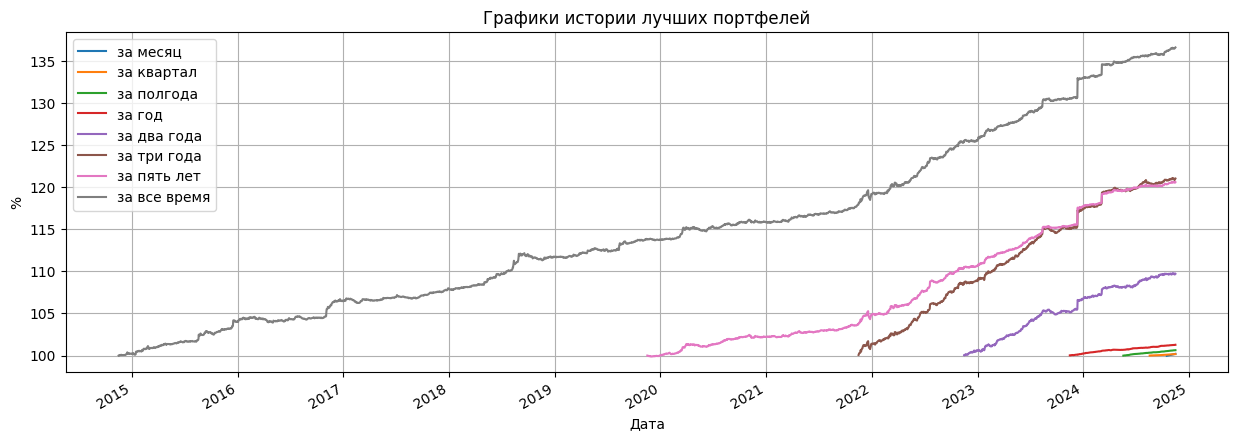

In [25]:
_ = (best_portf_hist*100).plot(
    figsize=(15,5),
    title="Графики истории лучших портфелей",
    grid=True,
    ylabel="%"
)